In [1]:
import pandas as pd

In [3]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#pmf = surival/total_count
survical_count = titanic['Survived'].value_counts()
survical_count

0    549
1    342
Name: Survived, dtype: int64

In [7]:
total_count = len(titanic['Survived'])
total_count

891

In [9]:
pmf_survival =  survical_count/total_count
pmf_survival

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [12]:
pmf_dictionary = {'survived':pmf_survival.index,'pmf':pmf_survival.values}
pmf_dictionary

{'survived': Int64Index([0, 1], dtype='int64'),
 'pmf': array([0.61616162, 0.38383838])}

In [14]:
pmf_df = pd.DataFrame(pmf_dictionary)
pmf_df

,survived,pmf
0,0,0.616162
1,1,0.383838


### Plot above

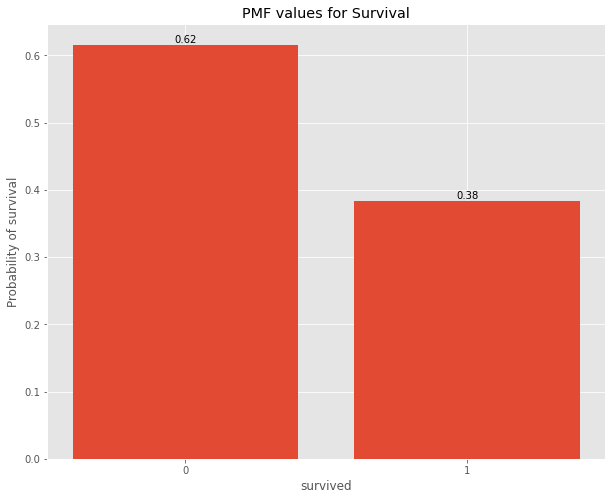

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
bars = plt.bar(pmf_df['survived'],pmf_df['pmf'])
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()  # Get height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height,2)}', ha='center', va='bottom')
labels =(0,1)
#plt.xticks(ticks=labels)
plt.xticks(range(len(pmf_survival.index)))
plt.xlabel('survived')
plt.ylabel('Probability of survival')
plt.title('PMF values for Survival');

In [34]:
range(len(pmf_survival.index))

range(0, 2)

### Question: use the titanic dataset to compute the probability Density Function indicating the ages of the passengers who survived and those who did not survive

In [40]:
titanic =sns.load_dataset('titanic')
df = titanic[['age','survived']].dropna()
df.head()

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


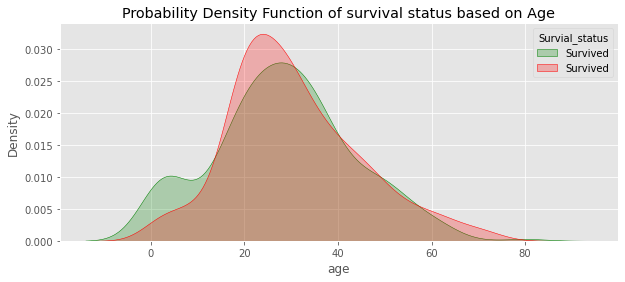

In [58]:
#plot pdf for age and survival status
plt.figure(figsize=(10,4))
survived = df.query('survived==1')['age']
n_survived = df.query('survived==0')['age']
sns.kdeplot(survived,fill=True,label='Survived',color='g')
sns.kdeplot(n_survived,fill=True,label='Survived',color='r')
plt.title('Probability Density Function of survival status based on Age')
plt.legend(title='Survial_status');

In [61]:
#Define the age range for further analysis
age_min,age_max = 20,40
#Filter the dataset for passengers within the defined age range of 20 and 40
filtered_df = df.query('age>=@age_min & age<=@age_max')
filtered_df

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
884,25.0,0
885,39.0,0
886,27.0,0
889,26.0,1


In [63]:
survived_df = filtered_df.query('survived==1')
survived_df

,age,survived
1,38.0,1
2,26.0,1
3,35.0,1
8,27.0,1
21,34.0,1
...,...,...
858,24.0,1
866,27.0,1
874,28.0,1
880,25.0,1


In [66]:
not_survived_df = filtered_df.query('~(survived==1)')
not_survived_df = filtered_df.query('survived==0')
not_survived_df

,age,survived
0,22.0,0
4,35.0,0
12,20.0,0
13,39.0,0
18,31.0,0
...,...,...
883,28.0,0
884,25.0,0
885,39.0,0
886,27.0,0


In [70]:
#calculate the Density for survivors
import numpy as np
from scipy.stats import gaussian_kde
age_values = np.linspace(age_min,age_max,100)

#calculate the density for those who survived and those who did not
kde_survived = gaussian_kde(survived_df['age'])
kde_survived_density = kde_survived(age_values)
kde_survived_density


array([0.02320662, 0.02531543, 0.02745777, 0.0296155 , 0.03176979,
       0.03390161, 0.03599207, 0.03802288, 0.03997671, 0.04183754,
       0.04359102, 0.04522474, 0.04672851, 0.0480945 , 0.04931746,
       0.05039476, 0.05132642, 0.05211509, 0.05276591, 0.05328635,
       0.05368594, 0.05397597, 0.05416908, 0.05427889, 0.05431953,
       0.05430517, 0.05424963, 0.05416597, 0.05406611, 0.05396058,
       0.05385833, 0.05376658, 0.05369082, 0.05363483, 0.05360077,
       0.05358937, 0.05360006, 0.05363122, 0.05368031, 0.05374413,
       0.05381895, 0.0539007 , 0.05398506, 0.05406764, 0.05414407,
       0.05421009, 0.05426173, 0.05429536, 0.05430786, 0.05429671,
       0.05426012, 0.05419712, 0.05410763, 0.0539925 , 0.05385348,
       0.05369315, 0.05351479, 0.05332214, 0.05311919, 0.05290985,
       0.0526976 , 0.05248518, 0.05227419, 0.05206487, 0.05185582,
       0.05164391, 0.05142424, 0.05119024, 0.05093393, 0.05064624,
       0.05031753, 0.04993804, 0.04949858, 0.04899099, 0.04840

In [71]:
kde_survived = gaussian_kde(not_survived_df['age'])
kde_survived_density = kde_survived(age_values)
kde_survived_density

array([0.03781902, 0.04036421, 0.04279391, 0.04508198, 0.0472068 ,
       0.04915181, 0.05090587, 0.05246323, 0.05382332, 0.05499017,
       0.05597173, 0.05677902, 0.05742521, 0.05792469, 0.05829229,
       0.05854258, 0.05868935, 0.05874534, 0.05872208, 0.05863001,
       0.05847867, 0.05827698, 0.05803361, 0.05775726, 0.05745688,
       0.0571418 , 0.05682169, 0.05650635, 0.05620538, 0.05592779,
       0.05568142, 0.05547245, 0.05530492, 0.05518032, 0.0550973 ,
       0.05505163, 0.05503624, 0.05504154, 0.05505583, 0.05506591,
       0.05505776, 0.05501732, 0.05493117, 0.0547873 , 0.05457565,
       0.05428865, 0.05392151, 0.05347242, 0.05294256, 0.05233591,
       0.05165905, 0.0509207 , 0.05013129, 0.04930242, 0.04844632,
       0.04757535, 0.04670148, 0.04583585, 0.04498842, 0.04416769,
       0.04338051, 0.04263193, 0.04192525, 0.04126199, 0.04064204,
       0.04006384, 0.03952454, 0.03902026, 0.0385463 , 0.03809746,
       0.03766822, 0.03725303, 0.03684647, 0.03644351, 0.03603

In [74]:
#print the density values for each survivors age

for age, density in zip(age_values,kde_survived_density):
    print(f'Age{round(age,2)}, Density{round(density,2)}')

Age20.0, Density0.04
Age20.2, Density0.04
Age20.4, Density0.04
Age20.61, Density0.05
Age20.81, Density0.05
Age21.01, Density0.05
Age21.21, Density0.05
Age21.41, Density0.05
Age21.62, Density0.05
Age21.82, Density0.05
Age22.02, Density0.06
Age22.22, Density0.06
Age22.42, Density0.06
Age22.63, Density0.06
Age22.83, Density0.06
Age23.03, Density0.06
Age23.23, Density0.06
Age23.43, Density0.06
Age23.64, Density0.06
Age23.84, Density0.06
Age24.04, Density0.06
Age24.24, Density0.06
Age24.44, Density0.06
Age24.65, Density0.06
Age24.85, Density0.06
Age25.05, Density0.06
Age25.25, Density0.06
Age25.45, Density0.06
Age25.66, Density0.06
Age25.86, Density0.06
Age26.06, Density0.06
Age26.26, Density0.06
Age26.46, Density0.06
Age26.67, Density0.06
Age26.87, Density0.06
Age27.07, Density0.06
Age27.27, Density0.06
Age27.47, Density0.06
Age27.68, Density0.06
Age27.88, Density0.06
Age28.08, Density0.06
Age28.28, Density0.06
Age28.48, Density0.05
Age28.69, Density0.05
Age28.89, Density0.05
Age29.09, Den